In [1]:
import sys, os
sys.path.append(os.pardir)

os.environ["KERAS_BACKEND"]='tensorflow'
#import glob
import numpy as np


weight_choice = input('Which weights to choose? 1:normal 2:lle 3:iso')



#from multiprocessing import Pool
#import multiprocessing as multi
#from data.func import load_npy, padding_mat
#sys.path.append('C:\\ProgramData\\Anaconda3\\pkgs\\pydot-1.2.3-py36hd4f83f9_0\\Lib\\site-packages')
#sys.path

save_model_path = '/home/owner/デスクトップ/milnet+edu/results/0723 (15,40)/params_adadelta_normal.hdf5'

path_to_15_40 = 'milnet+edu/data/Preprocessed/15words+40sent/'
path_to_20_50 = 'milnet+edu/data/Preprocessed/20words+50sent/'
path =path_to_15_40

x_train = np.load('/home/owner/デスクトップ/'+path+'train_data_features_sorted.npy')#np.load('/home/owner/デスクトップ/PythonFile/imdb/x_train_sort.npy')
y_train = np.load('/home/owner/デスクトップ/'+path+'train_data_scores_binary.npy')#np.load('/home/owner/デスクトップ/PythonFile/imdb/x_test_sort.npy')
#print(x_test)

x_test = np.load('/home/owner/デスクトップ/'+path+'test_data_features_sorted.npy')#np.load('/home/owner/デスクトップ/PythonFile/imdb/t_train.npy')
y_test = np.load('/home/owner/デスクトップ/'+path+'test_data_scores_binary.npy')#np.load('/home/owner/デスクトップ/PythonFile/imdb/t_test.npy')

x_valid = np.load('/home/owner/デスクトップ/'+path+'validation_data_features_sorted.npy')
y_valid = np.load('/home/owner/デスクトップ/'+path+'validation_data_scores_binary.npy')

#train_idx = np.load('/home/owner/デスクトップ/'+path+'train_data_idx_binary_only.npy')
#test_idx = np.load('/home/owner/デスクトップ/'+path+'test_data_idx_binary_only.npy')
#valid_idx = np.load('/home/owner/デスクトップ/'+path+'validation_data_idx_binary_only.npy')

#print(len(train_idx))
#x_train = x_train[train_idx]
#y_train = y_train[train_idx]
#print(len(x_train))
#print(len(y_train))

#x_test = x_test[test_idx]
#y_test = y_test[test_idx]

#x_valid = x_valid[valid_idx]
#y_valid = y_valid[valid_idx]

#print(x_valid)

word_idx=np.load( '/home/owner/デスクトップ/milnet+edu/data/Preprocessed/20words+50sent/' + 'vocab_idx.npy')
#print(idx)
#mani_choice = input('Which weights to choose? 1:normal 2:lle 3:iso ')
if (int(weight_choice)==1):
    embWeights=np.load( '/home/owner/デスクトップ/milnet+edu/data/Preprocessed/20words+50sent/' + 'weights.npy')#np.load('/home/owner/デスクトップ/PythonFile/imdb/weights.npy')
elif (int(weight_choice)==2):
    embWeights=np.load( '/home/owner/デスクトップ/milnet+edu/data/manifold_weights/' + 'weights_LLE1_1000_20_300.npy')#np.load('/home/owner/デスクトップ/PythonFile/imdb/weights.npy')
elif (int(weight_choice)==3):
     embWeights=np.load( '/home/owner/デスクトップ/milnet+edu/data/manifold_weights/' + 'weights_Isomap_1_1000_20_300.npy')

print(len(word_idx))
print(y_test)

print('data loaded')



import keras
from keras.layers import Input, merge
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
import keras.backend as K
from keras.layers import Lambda, regularizers, Average

from keras.models import Model
from keras.layers import Input, Conv2D, Conv1D, MaxPooling2D, GlobalMaxPooling2D, GlobalMaxPooling1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import GRU
from keras.layers.wrappers import Bidirectional, TimeDistributed
from keras.layers.core import Dropout, Dense, Lambda, Masking
from keras.layers import merge, Layer, Activation, Dot, Concatenate, Flatten, Lambda

from keras.initializers import Identity,glorot_normal
from keras import regularizers

from keras import metrics

from keras.utils import plot_model


Which weights to choose? 1:normal 2:lle 3:iso1
61628
[0 0 0 ... 1 1 1]
data loaded


/home/owner/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/owner/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [5]:
li = [x_train.tolist(), x_test.tolist(), x_valid.tolist()]
for idx in range(3):
    features = li[idx]
    print(len(features))
    for i in range(len(features)):
        #print(len(features[i]))
        if len(features[i])!=40:
                print('i:'+str(i)+'   ;;;;;;;;;;;;;;;;;;;;;')
                print(len(features[i]))
                li[idx][i].append(li[idx][i][-1])
        for j in range(len(features[i])):

            #print(len(features[i][j]))
            if len(features[i][j])!= 15:
                print('i:'+str(i)+'j:'+str(j)+'   *************************')

x_train=np.asarray(li[0])
x_test=np.asarray(li[1])
x_valid=np.asarray(li[2])

210642
25510
25206


In [6]:
print(x_train.shape, x_test.shape, x_valid.shape)
print(y_train.shape, y_test.shape, y_valid.shape)

(210642, 40, 15) (25510, 40, 15) (25206, 40, 15)
(210642,) (25510,) (25206,)


In [9]:
numSentencesPerDoc, numWordsPerSentence = x_train[0].shape[0], x_train[0].shape[1]
print(numSentencesPerDoc, numWordsPerSentence)
#print(x_train[0])

vocabSize, embeddingSize = embWeights.shape[0], embWeights.shape[1]
print(vocabSize, embeddingSize)

dropWordEmb = 0.25
recursiveClass = GRU

filters = 100 #embeddingSize*2
windowMin = 3
windowMax = 6# dimOfSentimentMetrics = 5
batch_size = 200
#epochs = 25
dimGRU = 50
numDensePool=10
eta = 1e-4
dr = 0.5

##

#wordsInputs = Input(shape=(numWordsPerSentence,1), batch_shape=(numSentencesPerDoc,numWordsPerSentence,), dtype='int32', name='words_input')

x_in = Input( shape = ( numSentencesPerDoc, numWordsPerSentence ) , name='Input' )
#x_pop = Lambda( lambda x: x, output_shape=(numWordsPerSentence, ) , name='convert_shape' )( x_in )
    
#Layer functionの定義
embLayer = Embedding( input_dim=embWeights.shape[0], output_dim=embWeights.shape[1], weights=[embWeights]
                      ,mask_zero=False , trainable=False, embeddings_regularizer=regularizers.l2(0.0000001)
                      , input_length=numWordsPerSentence, name='Embedding' )


maxPooledPerDoc = []
convNets = []
maxPools = []

extraDimLayer = Lambda(lambda x: K.expand_dims(x), name='extraDimForConvo')
squeezeThirdLayer = Lambda(lambda x: K.squeeze(x, 3), name='squeezeThirdLayer')

for windowSize in range(windowMin,windowMax):
    name='word_mat_convo_win_size_'+str(windowSize)
    #convNet = Conv2D(filters, kernel_size=(windowSize,embeddingSize), padding='valid', activation='relu'
    #                 ,strides=1, use_bias=True, input_shape=(numWordsPerSentence, embeddingSize, 1), data_format="channels_last",kernel_initializer=glorot_normal()
    #                 ,bias_regularizer=regularizers.l2(eta), kernel_regularizer=regularizers.l2(eta),name=name)
    convNet = Conv1D(filters=filters, kernel_size=windowSize, padding='valid', activation='relu', strides=1)
    convNets.append(convNet)
    name='word_mat_max_pool_win_size_'+str(windowSize)
    maxPool = MaxPooling1D(pool_size = int(numWordsPerSentence-windowSize-1), padding='valid')
    maxPools.append(maxPool)
    
    
for i in range(numSentencesPerDoc):
    maxPooledPerSentence = []
    x_pop = Lambda(lambda x: x[:,i], output_shape=(numWordsPerSentence, ) , name='convert_shape_'+'sentence'+str(i+1))( x_in )

    for j in range(windowMax-windowMin):   
        emb = embLayer(x_pop)
        #emb = Dropout(dr,name='DropEmb'+str(i)+str(j))(emb)
        #reshaped = extraDimLayer(emb)#Lambda(lambda x: K.expand_dims(x), name='extraDimForConvo_'+str(j)+'_sentence_'+str(i))(emb)
        #name='word_mat_convo_win_size_'+str(j)+'_sentence_'+str(i)
        #wordsCNN = Conv2D(filters, kernel_size=(windowSize,embeddingSize), padding='valid', 
        #                    activation='relu', strides=1, use_bias=True, input_shape=(numWordsPerSentence, embeddingSize, 1), data_format="channels_last",
        #                    kernel_initializer=glorot_normal(),kernel_regularizer=regularizers.l2(),name=name)(reshaped)
        wordsCNN  = convNets[j](emb)
        #wordsCNN = Dropout(dr,name='DropCNN'+str(i)+str(j))(wordsCNN)
        #squeezed = squeezeThirdLayer(wordsCNN)#Lambda(lambda x: K.squeeze(x, 3), name='squeezeThirdLayer_'+str(j)+'_sentence_'+str(i))(wordsCNN)
        # newShape = (-1, int(squeezed.shape[1])*int(squeezed.shape[2]))
        # squeezed = Lambda(lambda x: K.reshape(x,shape=newShape), name ='squeezeDimForMaxPool'+str(i)+str(j))(squeezed)
        #wordsCNNPooled=GlobalMaxPooling1D()(squeezed)
        #wordsCNNPooled= MaxPooling1D(pool_size = int(squeezed.shape[1]), padding='valid')(squeezed)
        wordsCNNPooled = MaxPooling1D(pool_size=(numWordsPerSentence-(j+windowMin)+1))(wordsCNN)
        flattened = Lambda(lambda x: K.squeeze(x, 1))(wordsCNNPooled)
        maxPooledPerSentence.append(flattened)
        
    mergedPoolForSentence = Concatenate(axis = 1)(maxPooledPerSentence)
    newShape=(-1,1,int(mergedPoolForSentence.shape[1]))
    reshapedPoolForSentence = Lambda(lambda x: K.reshape(x,shape=newShape), name ='switch_axis_'+'sentence'+str(i+1)+'winSize'+str(j+windowMin))(mergedPoolForSentence)
    densePoolForSentence = Dense(numDensePool, bias_regularizer=regularizers.l2(eta),
                                 kernel_regularizer=regularizers.l2(eta), activation='softmax', use_bias=True)(reshapedPoolForSentence)

    densePoolForSentence = Dropout(dr,name='DropDense'+str(i))(densePoolForSentence)
    maxPooledPerDoc.append(densePoolForSentence)
    
#Naive Approach
averaged = Average()(maxPooledPerDoc) 
averaged = Lambda(lambda x:K.reshape(x,shape=(-1,int(averaged.shape[1])*int(averaged.shape[2]))), name ='attend_output')(averaged)
out_avg = Dense(1, activation='sigmoid', use_bias=True)(averaged) 
    
#Apply Attention 
mergedPoolPerDoc = Concatenate(axis = 1)(maxPooledPerDoc)
biRnn_ = Bidirectional(GRU(dimGRU,  return_sequences=True), merge_mode='concat')(mergedPoolPerDoc)
newShape = (-1, int(mergedPoolPerDoc.shape[1]), int(biRnn_.shape[2]))
biRnn = Lambda(lambda x: K.reshape(x,shape=newShape), name ='biRnn_TF_Reminder1')(biRnn_)
#biRnn2 = Lambda(lambda x: K.reshape(x,shape=newShape), name ='biRnn_TF_Reminder2')(biRnn_[1])

#biRnn_cat = Concatenate(axis = 2)([biRnn1, biRnn2])

CONTEXT_DIM = 100

eij = Dense(CONTEXT_DIM, use_bias=True, activation='tanh')(biRnn)
eij = Dense(1, use_bias=False, activation='softmax')(eij)

weighted_input = Dot(axes = 1)([eij, mergedPoolPerDoc])
#weighted_input = Lambda(lambda x: K.reshape(x,shape=(-1,int(weighted_input_.shape[1])*int(weighted_input_.shape[2]))), name ='attend_output')(weighted_input_)
weighted_input = Lambda(lambda x: K.squeeze(x, 1), name='squeezeOutput')(weighted_input)

out = Dense(1, activation='sigmoid', use_bias=True)(weighted_input)




##

model = Model(input=[x_in], output=[out])
adadelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
model.compile(loss='binary_crossentropy',
              optimizer=adadelta,
              metrics=['accuracy'])
         
#model.compile(loss='binary_crossentropy',
#              optimizer=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
#              metrics=['accuracy'])

print("Attention Model Build Complete")
##
#model_avg = Model(inputs=[x_in], outputs=[out_avg])
#model_avg.compile(loss='binary_crossentropy',
#              optimizer=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
#              metrics=['accuracy'])

#print("Average Model Build Complete")
##
#save model to png file
#from keras.utils import plot_model
#plot_model( model, to_file='model.png' )

#モデルを保存せず直接可視化
#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot
#SVG( model_to_dot( model ).create( prog='dot', format='svg' ) )

print('Will save to: '+save_model_path)
                    

40 15
61628 300
Attention Model Build Complete
Will save to: /home/owner/デスクトップ/milnet+edu/results/0723 (15,40)/params_adadelta_normal.hdf5


/home/owner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:115: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


In [10]:
#name = './params_milnet_adam_0720_3_adjCNN_fixed_weights.hdf5'
save_model = keras.callbacks.ModelCheckpoint(save_model_path, monitor='val_loss', verbose=1
                                             , save_best_only=True, save_weights_only=True, mode='min', period=1)

In [ ]:
history = model.fit(x_train, y_train, batch_size = batch_size, verbose=1, epochs=25 #epochs
                        ,validation_data=(x_valid,y_valid), shuffle=True, callbacks=[save_model])

Train on 210642 samples, validate on 25206 samples
Epoch 1/25
210642/210642 [==============================] - 295s 1ms/step - loss: 0.6474 - acc: 0.7573 - val_loss: 0.5172 - val_acc: 0.8300

Epoch 00001: val_loss improved from inf to 0.51723, saving model to /home/owner/デスクトップ/milnet+edu/results/0723 (15,40)/params_adadelta_normal.hdf5
Epoch 2/25
210642/210642 [==============================] - 293s 1ms/step - loss: 0.5351 - acc: 0.8049 - val_loss: 0.4677 - val_acc: 0.8383

Epoch 00002: val_loss improved from 0.51723 to 0.46772, saving model to /home/owner/デスクトップ/milnet+edu/results/0723 (15,40)/params_adadelta_normal.hdf5
Epoch 3/25
210642/210642 [==============================] - 293s 1ms/step - loss: 0.4954 - acc: 0.8207 - val_loss: 0.4731 - val_acc: 0.8429

Epoch 00003: val_loss did not improve
Epoch 4/25
164000/210642 [======================>.......] - ETA: 1:03 - loss: 0.4731 - acc: 0.8290

In [13]:
model.load_weights(name)#('./params_milnet_adam_0718_2_fixed_weights.hdf5')

In [9]:
history = model.fit(x_train, y_train, batch_size = batch_size, verbose=1, epochs=200 #epochs
                        ,initial_epoch=50, validation_data=(x_valid,y_valid), shuffle=True, callbacks=[save_model])

Train on 210642 samples, validate on 25206 samples
Epoch 51/200
210642/210642 [==============================] - 235s 1ms/step - loss: 0.5979 - acc: 0.7541 - val_loss: 0.5779 - val_acc: 0.7929

Epoch 00051: val_loss did not improve
Epoch 52/200
210642/210642 [==============================] - 236s 1ms/step - loss: 0.5970 - acc: 0.7544 - val_loss: 0.5791 - val_acc: 0.7942

Epoch 00052: val_loss did not improve
Epoch 53/200
210642/210642 [==============================] - 235s 1ms/step - loss: 0.5976 - acc: 0.7535 - val_loss: 0.5818 - val_acc: 0.7967

Epoch 00053: val_loss did not improve
Epoch 54/200
210432/210642 [============================>.] - ETA: 0s - loss: 0.5973 - acc: 0.7540

KeyboardInterrupt: 

In [ ]:
history = model_avg.fit(x_train, y_train, batch_size = batch_size, verbose=1, epochs=300 #epochs
                        , validation_data=(x_valid,y_valid), shuffle=True, callbacks=[save_model])

In [11]:
#plot history
import matplotlib.pyplot as plt
def plot_history(history):
    # 精度の履歴をプロット
    plt.plot(history.history['acc'],label="accuracy")
    plt.plot(history.history['val_acc'],"o-",label="val_acc")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'],label="loss",)
    plt.plot(history.history['val_loss'],"o-",label="val_loss")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='lower right')
    plt.show()
    

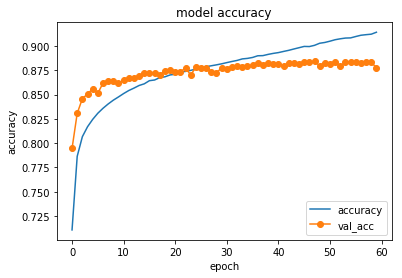

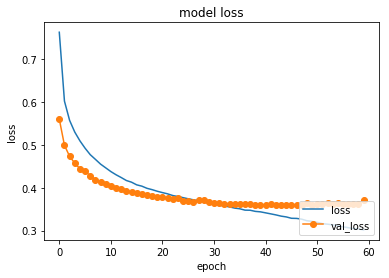

In [12]:
plot_history(history)

In [7]:
model.load_weights('./params_milnet_adam_0717_1.hdf5')

In [14]:
score=model.evaluate(x_test, y_test)

25510/25510 [==============================] - 49s 2ms/step


In [15]:
print(score[0],score[1])

0.357398352801496 0.8829086632693062


In [6]:
len(y_train)

210642